<a href="https://colab.research.google.com/github/PadalaKavya/MajorProject/blob/master/multiclass(naive_bayes%2Csvm%2Cdt%2Crf%2Clr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [ ]:
df.head()


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
# Checking for null values
np.sum(df.isnull())

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
# storing the data in lists
tweet, type = list(df['tweet_text']), list(df['cyberbullying_type'])

In [ ]:
df.iloc[0][0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])

# **Preprocessing**

Removing Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['tweet_text']= df['tweet_text'].apply(lambda x:remove_punctuation(x))
df.head()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,In other words katandandre your food was crapi...,not_cyberbullying,3
1,Why is aussietv so white MKR theblock ImACeleb...,not_cyberbullying,3
2,XochitlSuckkks a classy whore Or more red velv...,not_cyberbullying,3
3,JasonGio meh P thanks for the heads up but no...,not_cyberbullying,3
4,RudhoeEnglish This is an ISIS account pretendi...,not_cyberbullying,3


2. Lowering the text

In [ ]:
df['tweet_text']= df['tweet_text'].apply(lambda x: x.lower())

3. Tokenization

In [ ]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['tweet_text']= df['tweet_text'].apply(lambda x: tokenization(x))

4. Stop word removal

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [ ]:
df['tweet_text']= df['tweet_text'].apply(lambda x:remove_stopwords(x))

5. Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
df['tweet_text']=df['tweet_text'].apply(lambda x: stemming(x))

Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['tweet_text']=df['tweet_text'].apply(lambda x:lemmatizer(x))

# **Data Visualization**

In [ ]:
new_df = df
new_df = new_df[new_df['cyberbullying_type'] != 'other_cyberbullying']
new_df = new_df[new_df['cyberbullying_type'] != 'not_cyberbullying']
new_df = new_df['tweet_text'].apply(lambda x: " ".join(x))

In [ ]:
new_df

7945     rape is realzvasiyana nema jokes about being d...
7946     you never saw any celebrity say anything like ...
7947     manhattaknight i mean hes gay but he uses gend...
7948     rt raulnovoa16 aliciabernardez alexaim mecaesm...
7949     rape is rape and the fact that i read one post...
                               ...                        
47687    black ppl arent expected to do anything depend...
47688    turner did not withhold his disappointment tur...
47689    i swear to god this dumb nigger bitch i have g...
47690    yea fuck you rt therealexel if youre a nigger ...
47691    bro u gotta chill rt chillshrammy dog fuck kp ...
Name: tweet_text, Length: 31924, dtype: object

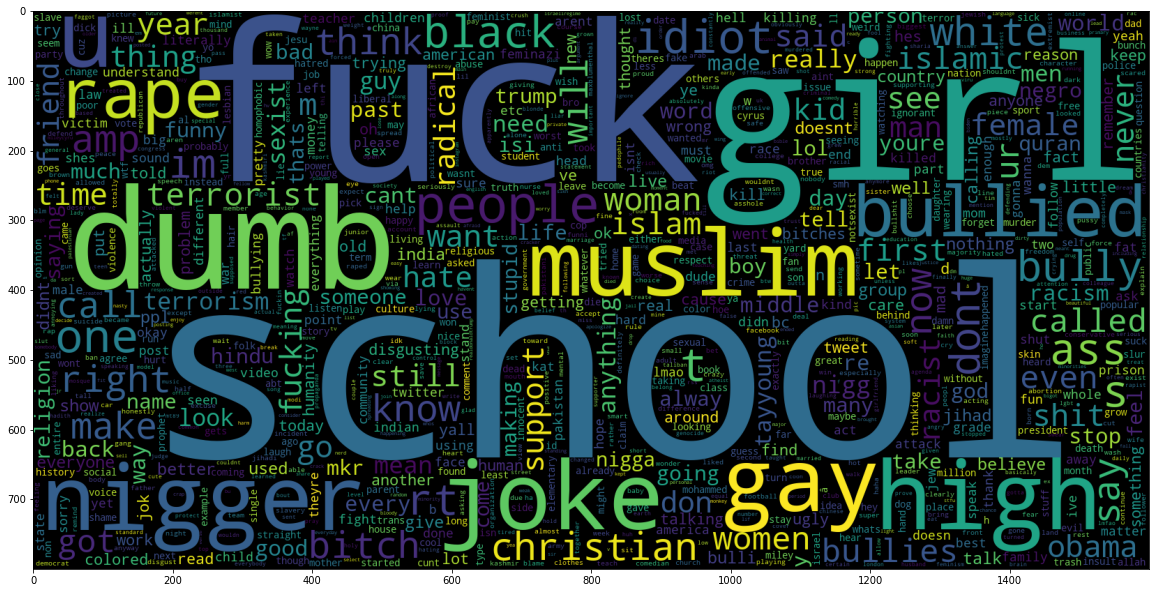

In [ ]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [ ]:
df['tweet_text'] = df['tweet_text'].apply(lambda x : " ".join(x))
df

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,in other words katandandre your food was crapi...,not_cyberbullying,3
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying,3
2,xochitlsuckkks a classy whore or more red velv...,not_cyberbullying,3
3,jasongio meh p thanks for the heads up but no...,not_cyberbullying,3
4,rudhoeenglish this is an isis account pretendi...,not_cyberbullying,3
...,...,...,...
47687,black ppl arent expected to do anything depend...,ethnicity,1
47688,turner did not withhold his disappointment tur...,ethnicity,1
47689,i swear to god this dumb nigger bitch i have g...,ethnicity,1
47690,yea fuck you rt therealexel if youre a nigger ...,ethnicity,1


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X, y = df['tweet_text'], df['cyberbullying_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

In [ ]:
# # Transforming the data using TF-IDF Vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
# vectoriser.fit(X_train)
# print("No. of feature words: ",len(vectoriser.get_feature_names()))

In [ ]:
'''X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)'''

'X_train = vectoriser.transform(X_train)\nX_test = vectoriser.transform(X_test)'

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df['tweet_text'], df['cyberbullying_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33384,)
(33384,)
(14308,)
(14308,)


In [ ]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1    2    3    4    5]
 [5610 5537 5563 5552 5536 5586]]


In [ ]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1    2    3    4    5]
 [2382 2424 2410 2393 2287 2412]]


In [ ]:
#Random oversampling on training data
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['tweet_text', 'cyberbullying_type_encoded']);

In [ ]:
X_train = train_os['tweet_text'].values
y_train = train_os['cyberbullying_type_encoded'].values

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5610],
       [   1, 5610],
       [   2, 5610],
       [   3, 5610],
       [   4, 5610],
       [   5, 5610]])

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)
%matplotlib inline

In [ ]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [ ]:
sentiments = ["religion","age","ethnicity","gender","not bullying"]

NORMAL ML MODELS

In [ ]:
def getStatsFromModel(model):
  
  print(classification_report(y_test, y_pred))
  #disp = plot_precision_recall_curve(model, X_test, y_test)
  #disp.ax_.set_title('Precision-Recall curve: ')
 
  '''
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovo')
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic(ROC)')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  '''
  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
sentiment_model = Pipeline(
    steps=[
        (
            "TfidfVectorizer",TfidfVectorizer(ngram_range=(1,2), max_features= 500000,lowercase=True)
        ),
        (
            "naive_bayes", MultinomialNB()
       )
])

In [ ]:
sentiment_model.fit(X_train, y_train)

Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(max_features=500000, ngram_range=(1, 2))),
                ('naive_bayes', MultinomialNB())])

In [ ]:
y_pred   = sentiment_model.predict(X_test)
accuracy = sentiment_model.score(X_test, y_test)


Accuracy:  0.7112105116019011


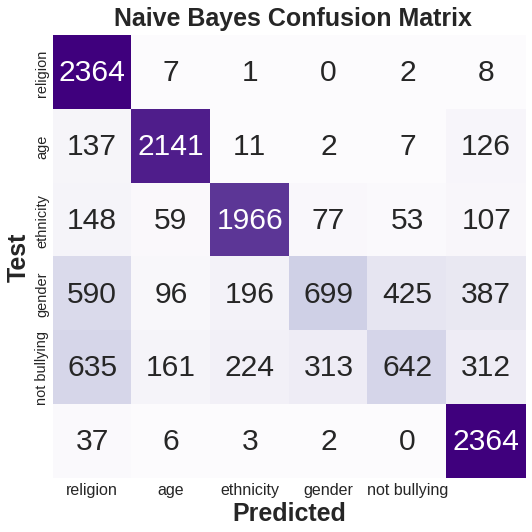


Confusion Matrix: 
 None

Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2382
           1       0.87      0.88      0.87      2424
           2       0.82      0.82      0.82      2410
           3       0.64      0.29      0.40      2393
           4       0.57      0.28      0.38      2287
           5       0.72      0.98      0.83      2412

    accuracy                           0.71     14308
   macro avg       0.70      0.71      0.67     14308
weighted avg       0.70      0.71      0.68     14308



In [ ]:
print("Accuracy: ",accuracy)
print("\nConfusion Matrix: \n", conf_matrix(y_test, y_pred,' Naive Bayes Confusion Matrix',sentiments))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

In [ ]:
example = ["RT @Yo_aRob Some of y'all girls should be nuns for Halloween cause y'all been hoes all year round.",]
example

["RT @Yo_aRob Some of y'all girls should be nuns for Halloween cause y'all been hoes all year round."]

In [ ]:
prediction = sentiment_model.predict(example)

In [ ]:
print(prediction)

[2]


SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
sentiment_model = Pipeline(
    steps=[
        (
            "TfidfVectorizer",TfidfVectorizer(ngram_range=(1,2), max_features= 500000,lowercase=True)
        ),
        (
            "linearsvc", LinearSVC()
       )
])

In [ ]:
sentiment_model.fit(X_train, y_train)

Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(max_features=500000, ngram_range=(1, 2))),
                ('linearsvc', LinearSVC())])

Accuracy:  0.8201006429969248


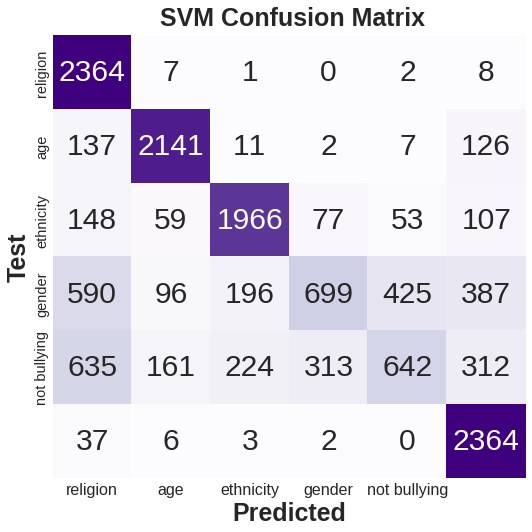


Confusion Matrix: 
 None

Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2382
           1       0.87      0.88      0.87      2424
           2       0.82      0.82      0.82      2410
           3       0.64      0.29      0.40      2393
           4       0.57      0.28      0.38      2287
           5       0.72      0.98      0.83      2412

    accuracy                           0.71     14308
   macro avg       0.70      0.71      0.67     14308
weighted avg       0.70      0.71      0.68     14308



In [ ]:
predictions  = sentiment_model.predict(X_test)
accuracy = sentiment_model.score(X_test, y_test)
print("Accuracy: ",accuracy)
print("\nConfusion Matrix: \n", conf_matrix(y_test, y_pred,' SVM Confusion Matrix',sentiments))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

In [ ]:
import pickle
pickle.dump(sentiment_model, open('svmmodel.pkl', 'wb'))


In [ ]:
pickled_model = pickle.load(open('svmmodel.pkl', 'rb'))
pickled_model.predict(X_test)

array([4, 4, 5, ..., 3, 5, 2])

DECISION TREE

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
sentiment_model = Pipeline(
    steps=[
        (
            "TfidfVectorizer",TfidfVectorizer(ngram_range=(1,2), max_features= 500000,lowercase=True)
        ),
        (
            "decisiontree", DecisionTreeClassifier()
       )
])


In [ ]:
sentiment_model.fit(X_train, y_train)

Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(max_features=500000, ngram_range=(1, 2))),
                ('decisiontree', DecisionTreeClassifier())])

Accuracy:  0.7768381325132793


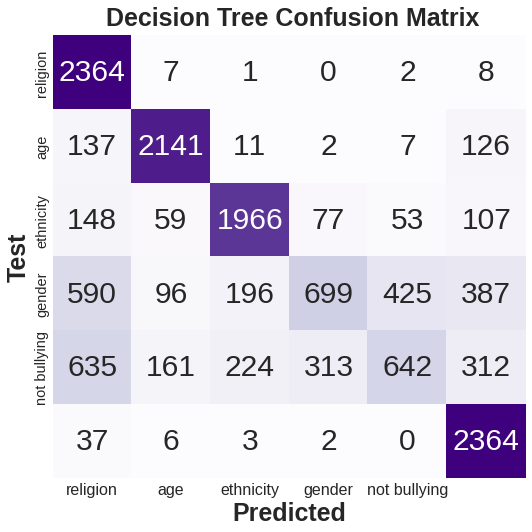


Confusion Matrix: 
 None

Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2382
           1       0.87      0.88      0.87      2424
           2       0.82      0.82      0.82      2410
           3       0.64      0.29      0.40      2393
           4       0.57      0.28      0.38      2287
           5       0.72      0.98      0.83      2412

    accuracy                           0.71     14308
   macro avg       0.70      0.71      0.67     14308
weighted avg       0.70      0.71      0.68     14308



In [ ]:
predictions  = sentiment_model.predict(X_test)
accuracy = sentiment_model.score(X_test, y_test)
print("Accuracy: ",accuracy)
print("\nConfusion Matrix: \n", conf_matrix(y_test, y_pred,' Decision Tree Confusion Matrix',sentiments))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

RANDOM FOREST

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
sentiment_model = Pipeline(
    steps=[
        (
            "TfidfVectorizer",TfidfVectorizer(ngram_range=(1,2), max_features= 500000,lowercase=True)
        ),
        (
            "random_forest", RandomForestClassifier(max_depth=50, random_state=0)
       )
])


In [ ]:
sentiment_model.fit(X_train, y_train)

Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(max_features=500000, ngram_range=(1, 2))),
                ('random_forest',
                 RandomForestClassifier(max_depth=50, random_state=0))])

Accuracy:  0.7876712328767124


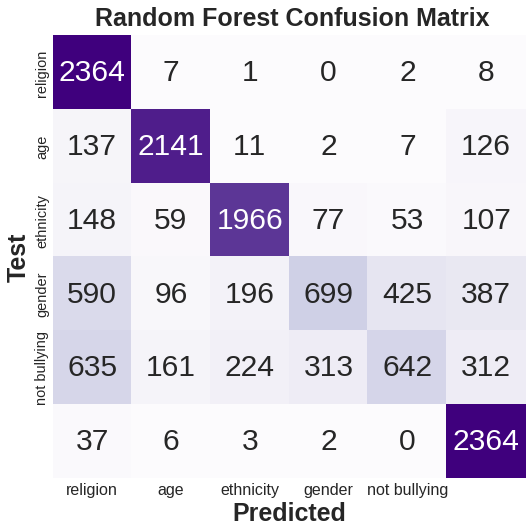


Confusion Matrix: 
 None

Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2382
           1       0.87      0.88      0.87      2424
           2       0.82      0.82      0.82      2410
           3       0.64      0.29      0.40      2393
           4       0.57      0.28      0.38      2287
           5       0.72      0.98      0.83      2412

    accuracy                           0.71     14308
   macro avg       0.70      0.71      0.67     14308
weighted avg       0.70      0.71      0.68     14308



In [ ]:
predictions  = sentiment_model.predict(X_test)
accuracy = sentiment_model.score(X_test, y_test)
print("Accuracy: ",accuracy)
print("\nConfusion Matrix: \n", conf_matrix(y_test, y_pred,' Random Forest Confusion Matrix',sentiments))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

In [ ]:
example = ["RT @Yo_aRob Some of y'all girls should be nuns for Halloween cause y'all been hoes all year round.",]
example

["RT @Yo_aRob Some of y'all girls should be nuns for Halloween cause y'all been hoes all year round."]

In [ ]:
import pickle
pickle.dump(sentiment_model, open('rfmodel.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('rfmodel.pkl', 'rb'))
pickled_model.predict(X_test)

array([4, 4, 5, ..., 3, 5, 2])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
sentiment_model = Pipeline(
    steps=[
        (
            "TfidfVectorizer",TfidfVectorizer(ngram_range=(1,2), max_features= 500000,lowercase=True)
        ),
        (
            "logistic_regression", LogisticRegression()
       )
])

In [ ]:
sentiment_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(max_features=500000, ngram_range=(1, 2))),
                ('logistic_regression', LogisticRegression())])

Accuracy:  0.8136706737489516


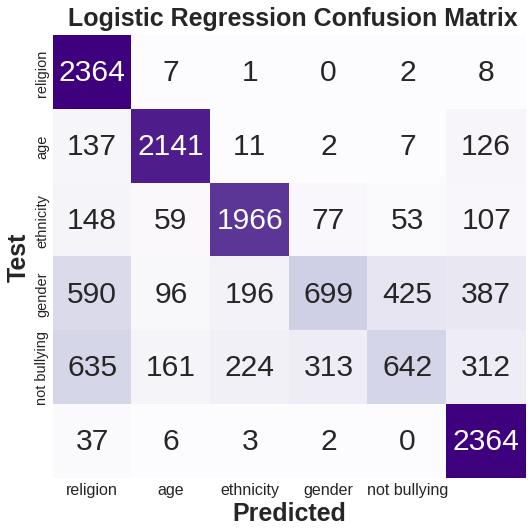


Confusion Matrix: 
 None

Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2382
           1       0.87      0.88      0.87      2424
           2       0.82      0.82      0.82      2410
           3       0.64      0.29      0.40      2393
           4       0.57      0.28      0.38      2287
           5       0.72      0.98      0.83      2412

    accuracy                           0.71     14308
   macro avg       0.70      0.71      0.67     14308
weighted avg       0.70      0.71      0.68     14308



In [ ]:
predictions  = sentiment_model.predict(X_test)
accuracy = sentiment_model.score(X_test, y_test)
print("Accuracy: ",accuracy)
print("\nConfusion Matrix: \n", conf_matrix(y_test, y_pred,' Logistic Regression Confusion Matrix',sentiments))
print("\nClassification Report: \n")
print(classification_report(y_test, y_pred))

In [ ]:
import pickle
pickle.dump(sentiment_model, open('logmodel.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('logmodel.pkl', 'rb'))
pickled_model.predict(X_test)

array([4, 4, 5, ..., 3, 5, 2])

# **LSTM**

In [ ]:
!pip install np_utils

In [ ]:
#model

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from keras.layers import Activation, Dense, Dropout

embedding_vector_features=45

model=Sequential()

model.add(Embedding(6000,32,input_length=500))

#model.add(LSTM(128,input_shape=(embedded_docs.shape),activation='relu',return_sequences=True))
model.add(LSTM(128,activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))

model.add(Dropout(0.2))

# for units in [128,128,64,32]:

# model.add(Dense(units,activation='relu'))

# model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentrophy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

In [ ]:
from sklearn.model_selection import train_test_split
X_final, y_final = df['tweet_text'], df['cyberbullying_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.1, random_state=42,stratify=y_final)

In [ ]:
# Transforming the data using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500)
vectoriser.fit(X_train)
print("No. of feature words: ",len(vectoriser.get_feature_names()))
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
#X_train = X_train.toarray()
#y_train = y_train.toarray()
#model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=120,batch_size=64)

In [ ]:
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import re, string
!pip install emoji
import emoji
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

#Transformers library for BERT
!pip install transformers
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup

from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)
%matplotlib inline
!pip install gensim
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec


In [ ]:
NUM_CLASSES = 5 #We are dealing with a multiclass classification of 5 classes
HIDDEN_DIM = 100 #number of neurons of the internal state (internal neural network in the LSTM)
LSTM_LAYERS = 1 #Number of stacked LSTM layers

LR = 3e-4 #Learning rate
DROPOUT = 0.5 #LSTM Dropout
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not
EPOCHS = 5 #Number of training epoch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class BiLSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(BiLSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [ ]:
'''
EMBEDDING_DIM = 200
BATCH_SIZE = 32
VOCAB_SIZE = 33010 #+1 for the padding
model = BiLSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to(DEVICE)
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary:
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)
#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)
'''

In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = 5e-6)

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')